<a href="https://colab.research.google.com/github/Abhinandan2809/AdultCensusIncomeClassifier/blob/main/adultcensusincome_naiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/adult.csv")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


In [ ]:
y=df.iloc[:,-1] #output data

<=50K    24720
>50K      7841
Name: income, dtype: int64


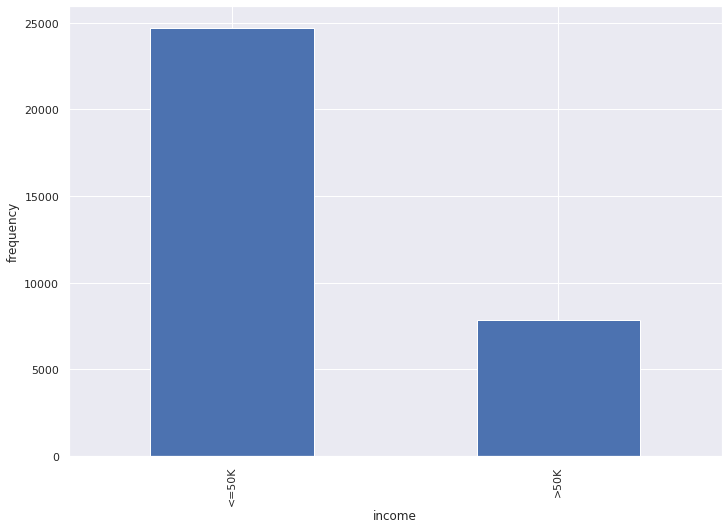

In [ ]:
y.value_counts().plot(kind='bar', xlabel='income', ylabel='frequency')
print(y.value_counts())

In [ ]:
#There is visible class imbalance as there are 24720 entries of class 1 i.e. with income<=50k and 7841 entries of class 2 i.e. >50k income


In [ ]:
df[df=='?']=np.nan #all unknown entries are set to nan

**Section 1: Data Visualization and Exploration**

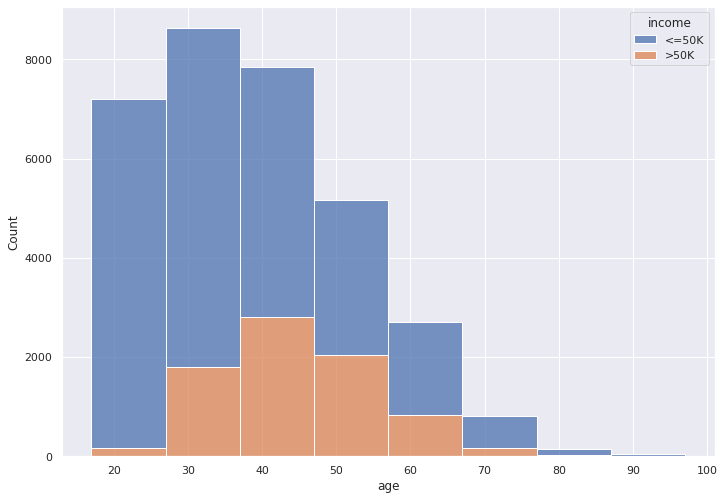

In [ ]:
sns.histplot(binwidth=10,x="age", hue="income", data=df, stat="count", multiple="stack")#skewed gaussian plot right skewed

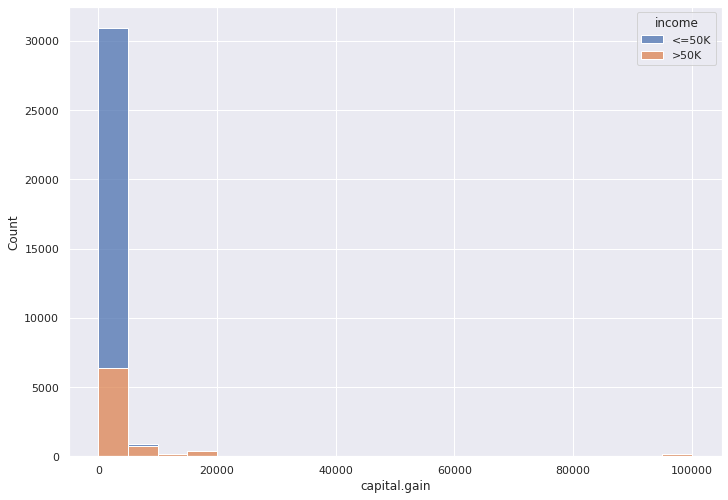

In [ ]:
sns.histplot(binwidth=5000,x="capital.gain", hue="income", data=df, stat="count", multiple="stack") #hard to interpret

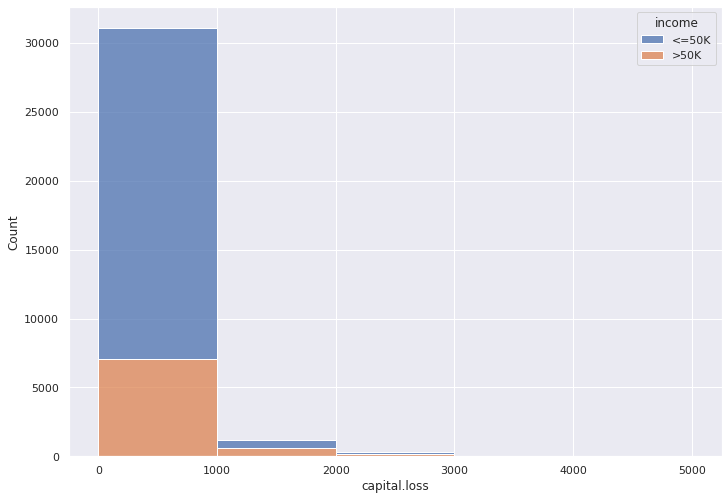

In [ ]:
sns.histplot(binwidth=1000,x="capital.loss", hue="income", data=df, stat="count", multiple="stack")#not of much meaning alone. Need to combine capital loss and gains.

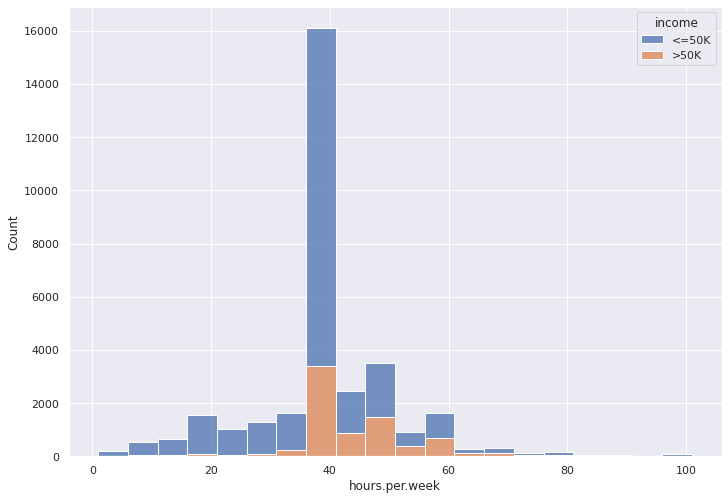

In [ ]:
sns.histplot(binwidth=5,x="hours.per.week", hue="income", data=df, stat="count", multiple="stack")#roughly gaussian

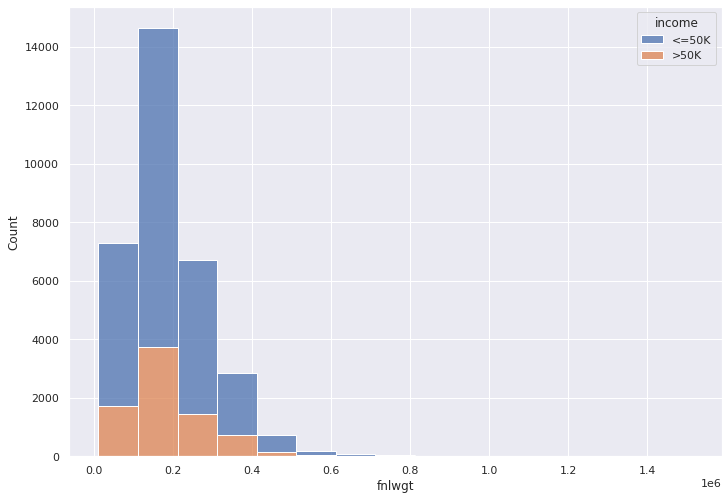

In [ ]:
sns.histplot(binwidth=100000,x="fnlwgt", hue="income",data=df, stat="count", multiple="stack")
#the graph below shows that the proportion of entries for each bin which have income >50k is almost the same meaning that the following feature does not affect the income
#this column can be dropped later in the preprocessing stage

In [ ]:
colname=df.columns
colname=list(colname)
colname.pop()

'income'

In [ ]:
df["native.country"].value_counts()
#since most people are from either US or Mexico we can treat the countries of other people as part of the Others Category

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [ ]:
for i in range(len(df["native.country"])):
  if df["native.country"][i]!="United-States" and df["native.country"][i]!="Mexico":
    df["native.country"][i]="Others" 

In [ ]:
df["native.country"].unique()

array(['United-States', 'Others', 'Mexico'], dtype=object)

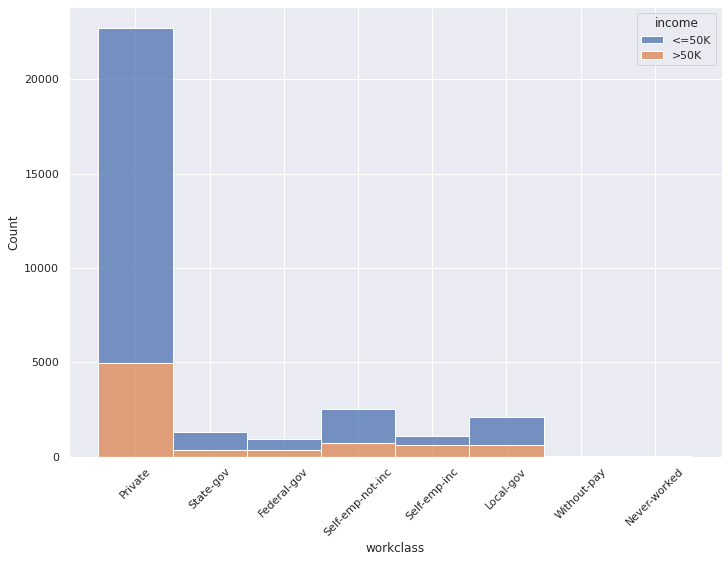

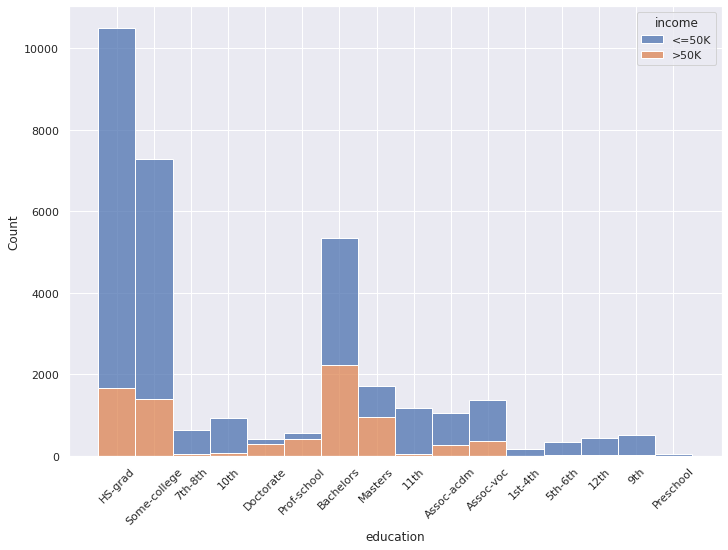

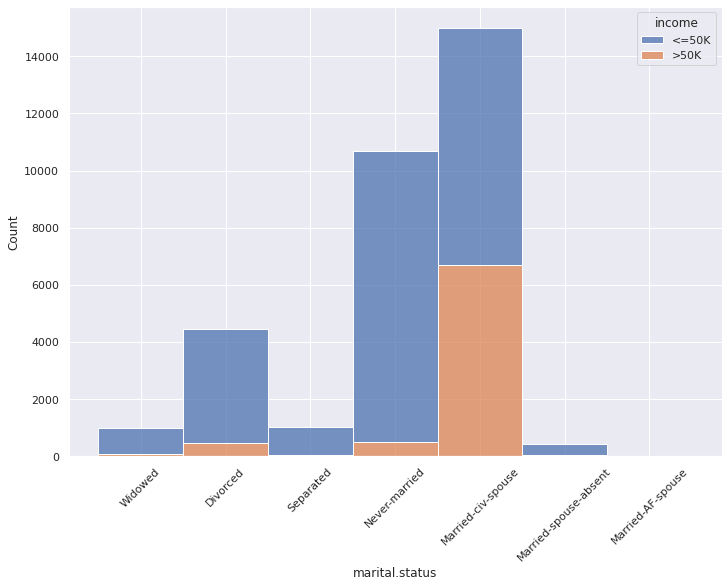

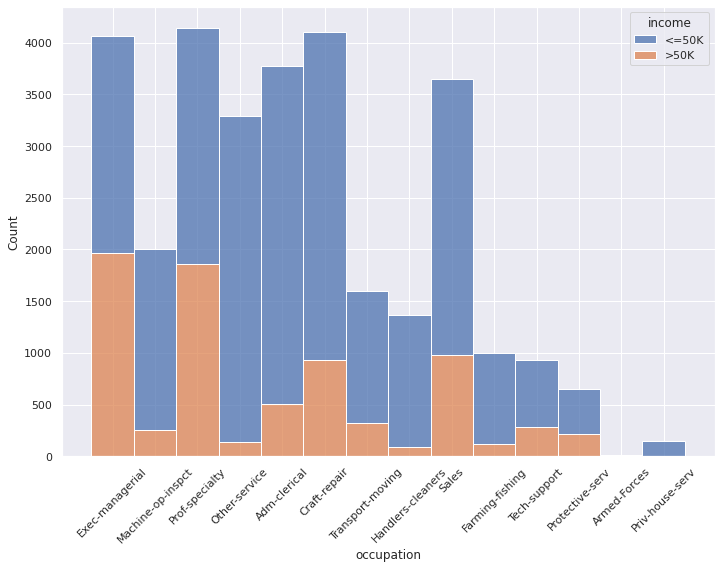

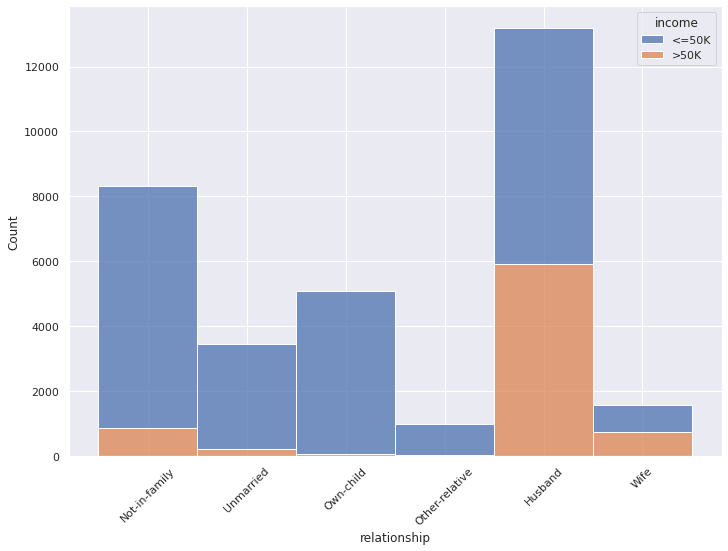

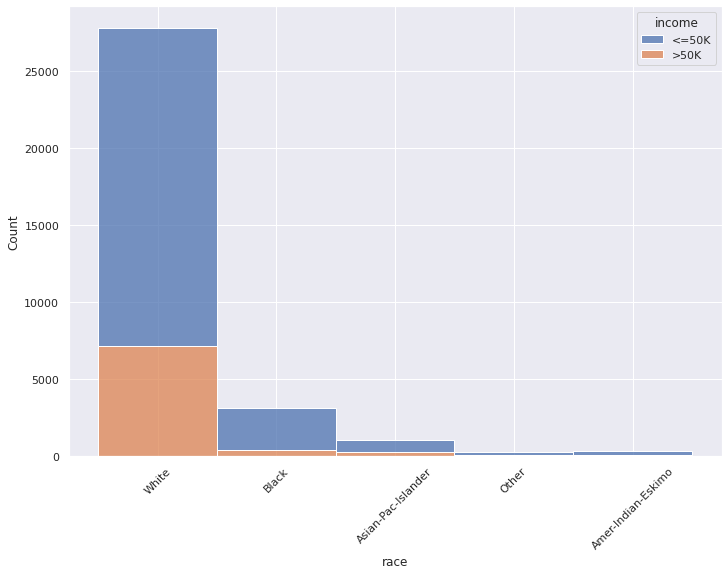

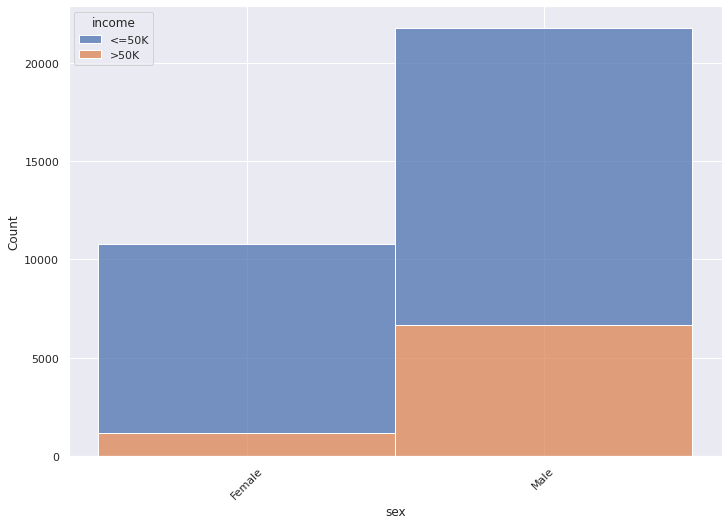

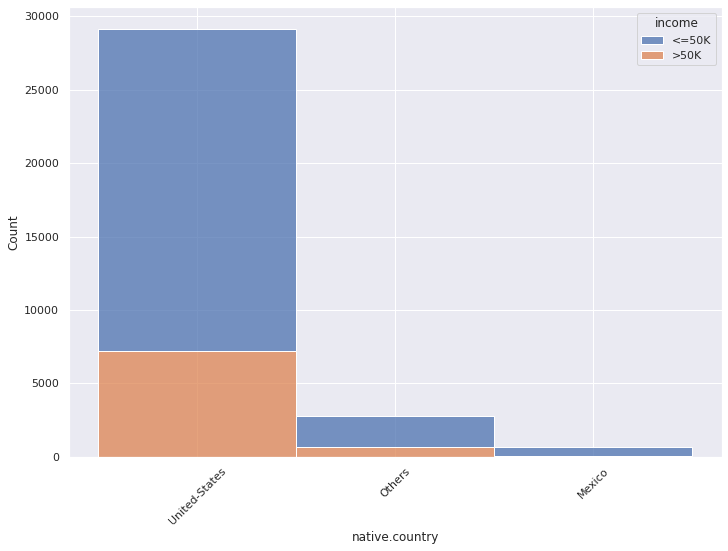

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in colname:
  if df[i].dtype=="object":
    sns.histplot(x=i, hue="income",data=df, stat="count", multiple="stack")
    plt.xticks(rotation=45)
    plt.show()

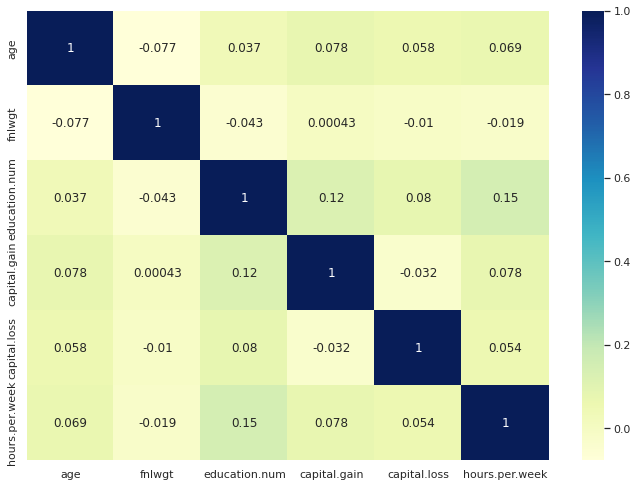

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [ ]:
#above is the correlation matrix of the given data plotted as a heat map and it does not show any strong correlation amongst the variables.
#this indicates that the variables are not strongly correlated and hence are features independent of each other so we cannot drop any variables based on correlation analysis

**Section 2: Data Pre-Processing and Cleaning**

In [ ]:
for i in range(len(colname)): 
  print(df[colname[i]].isnull().value_counts()) #finding number of nan fields in the data
  #The count for true shows the number of nan fields in each feature

False    32561
Name: age, dtype: int64
False    30725
True      1836
Name: workclass, dtype: int64
False    32561
Name: fnlwgt, dtype: int64
False    32561
Name: education, dtype: int64
False    32561
Name: education.num, dtype: int64
False    32561
Name: marital.status, dtype: int64
False    30718
True      1843
Name: occupation, dtype: int64
False    32561
Name: relationship, dtype: int64
False    32561
Name: race, dtype: int64
False    32561
Name: sex, dtype: int64
False    32561
Name: capital.gain, dtype: int64
False    32561
Name: capital.loss, dtype: int64
False    32561
Name: hours.per.week, dtype: int64
False    32561
Name: native.country, dtype: int64


In [ ]:
#since education.num is an integer representation of the education we can drop the education column.
#We do not need to one hot encode the education.num column since it is an ordinal variable and in general HS<Doctorate for eg to show which we can directly use the label encoding

In [ ]:
df.drop("fnlwgt",axis=1,inplace=True)
df.drop("education",axis=1, inplace=True)


In [ ]:
df.head(2)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


In [ ]:
colname=df.columns
for i in range(len(colname)): 
  print(df[colname[i]].isnull().value_counts()) #finding number of nan fields in the data
  #The count for true shows the number of nan fields in each feature
  #updated list of columns

False    32561
Name: age, dtype: int64
False    30725
True      1836
Name: workclass, dtype: int64
False    32561
Name: education.num, dtype: int64
False    32561
Name: marital.status, dtype: int64
False    30718
True      1843
Name: occupation, dtype: int64
False    32561
Name: relationship, dtype: int64
False    32561
Name: race, dtype: int64
False    32561
Name: sex, dtype: int64
False    32561
Name: capital.gain, dtype: int64
False    32561
Name: capital.loss, dtype: int64
False    32561
Name: hours.per.week, dtype: int64
False    32561
Name: native.country, dtype: int64
False    32561
Name: income, dtype: int64


In [ ]:
fillval=df["workclass"].mode()[0]
print(fillval)

Private


In [ ]:
df["workclass"].fillna('Private',inplace=True) #fill the missing entries with "Private" as it is the most occuring entry in the column

In [ ]:
df["workclass"].head(2)

0    Private
1    Private
Name: workclass, dtype: object

In [ ]:
fillval=df["occupation"].mode()[0]
print(fillval)

Prof-specialty


In [ ]:
df["occupation"].fillna(fillval,inplace=True) #fill the missing entries with "Prof-Speciality" as it is the most occuring entry in the column

In [ ]:
#the columns captial gain and capital loss can be combined into net capital to provide a more meaningful insight into the financial state of the individual

In [ ]:
df["capital.net"]=df["capital.gain"]-df["capital.loss"]

In [ ]:
df.head(2)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital.net
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,-4356
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,-4356


In [ ]:
df.drop("capital.gain",axis=1,inplace=True)
df.drop("capital.loss",axis=1,inplace=True)
#now we can drop the two columns since we have combined them

In [ ]:
df.head(2)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital.net
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K,-4356
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K,-4356


In [ ]:
#Outlier removal below
from scipy import stats
df[(np.abs(stats.zscore(df["age"])) < 3)]
df[(np.abs(stats.zscore(df["hours.per.week"])) < 3)]
df[(np.abs(stats.zscore(df["capital.net"])) < 3)]
#if the feature-value in an entry is 3 standard deviations away from the mean of that feature then the entry with that value of the feature is removed

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital.net
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K,-4356
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K,-4356
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,40,United-States,<=50K,-4356
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K,-3900
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K,-3900
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K,0
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0


In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)
    #To perform one hot encoding of variables

In [ ]:
df=encode_and_bind(df,"workclass")
df=encode_and_bind(df,"marital.status")
df=encode_and_bind(df,"occupation")
df=encode_and_bind(df,"relationship")
df=encode_and_bind(df,"race")
df=encode_and_bind(df,"sex")
df=encode_and_bind(df,"native.country")
#one hot encoding of all categorical variable (nominal) apart from education.num which is an ordinal variable

In [ ]:
df.head(2)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native.country_Mexico,native.country_Others,native.country_United-States
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,40,United-States,...,0,0,0,0,1,1,0,0,0,1
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,...,0,0,0,0,1,1,0,0,0,1


In [ ]:
#now we want to bring all the data to the same scale so we use min max normalization, the proper distribution of the data is not known so we use min max normalization as a safer approach

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
column = 'age'
df[column]=np.log(df[column])#to remove skewness
df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))
column = 'hours.per.week'
df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))#it is already roughly gaussian so no skewness removal needed
column = 'capital.net'
df[column]=np.square(df[column])#to remove skewness
df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))

In [ ]:
column = 'education.num'
df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))

In [ ]:
df.head(2)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native.country_Mexico,native.country_Others,native.country_United-States
0,1.000000,Private,0.533333,Widowed,Prof-specialty,Not-in-family,White,Female,0.397959,United-States,...,0,0,0,0,1,1,0,0,0,1
1,0.944143,Private,0.533333,Widowed,Exec-managerial,Not-in-family,White,Female,0.173469,United-States,...,0,0,0,0,1,1,0,0,0,1


In [ ]:
df.drop("workclass",axis=1,inplace=True)
df.drop("occupation",axis=1,inplace=True)
df.drop("relationship",axis=1,inplace=True)
df.drop("race",axis=1,inplace=True)
df.drop("sex",axis=1,inplace=True)
df.drop("marital.status",axis=1,inplace=True)
df.drop("native.country",axis=1,inplace=True)

In [ ]:
#drop all the unnecessary columns after one hot encoding

In [ ]:
df.head(2)

,age,education.num,hours.per.week,income,capital.net,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native.country_Mexico,native.country_Others,native.country_United-States
0,1.000000,0.533333,0.397959,<=50K,0.001898,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
1,0.944143,0.533333,0.173469,<=50K,0.001898,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1


In [ ]:
for i in range(len(df["income"])):
  if df["income"][i]=="<=50K":
    df["income"][i]=0
  else:
    df["income"][i]=1

    #assigning binary labels to income field

In [ ]:
df["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

**Section** 3: Model Building

In [ ]:
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)
#randomly assigning 80% of the dataframe to the train set and the remaining 20% to the test set
#this is based on the pareto principle that 80% of the effects come from 20% of the causes

In [ ]:
num_columns = 11
test_percent = 1/np.sqrt(num_columns)
print(test_percent)
train_percent = 1 - test_percent
train2=df.sample(frac=train_percent,random_state=200) #random state is a seed value
test2=df.drop(train2.index)
#this method uses the scaling law to calculate the split percentage as discussed in the paper  'A scaling law for the validation-set training-set size ratio'


0.30151134457776363


In [ ]:
x_train=train.copy()
x_train.drop("income",axis=1,inplace=True)
x_test=test.copy()
x_test.drop("income",axis=1,inplace=True)
y_train=train["income"].copy()
y_test=test["income"].copy()
x_train2=train2.copy()
x_train2.drop("income",axis=1,inplace=True)
x_test2=test2.copy()
x_test2.drop("income",axis=1,inplace=True)
y_train2=train2["income"].copy()
y_test2=test2["income"].copy()

In [ ]:
x_train.head(2)

,age,education.num,hours.per.week,capital.net,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native.country_Mexico,native.country_Others,native.country_United-States
32371,0.570610,0.8,0.551020,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
26318,0.482644,0.8,0.193878,0.0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1


In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [ ]:
cls1=GaussianNB()
cls2=BernoulliNB()
cls3=MultinomialNB()

In [ ]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train2=np.array(y_train2)
x_train2=np.array(x_train2)

In [ ]:
y_train=y_train.astype('int64')
x_test=np.array(x_test)
y_test=np.array(y_test).astype('int64')
y_train2=y_train2.astype('int64')
x_test2=np.array(x_test2)
y_test2=np.array(y_test2).astype('int64')

In [ ]:
cls1.fit(x_train,y_train)
predictions1=cls1.predict(x_test)
cls2.fit(x_train,y_train)
predictions2=cls2.predict(x_test)
cls3.fit(x_train,y_train)
predictions3=cls3.predict(x_test)


**Section 4: Performance Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("For 80/20 split:")
print()
print("Confusion Matrix:")
print()
print("GaussianNB:")
print(confusion_matrix(y_test,predictions1))
print()
print("BernoulliNB:")
print(confusion_matrix(y_test,predictions2))
print()
print("MultinomialNB:")
print()
print(confusion_matrix(y_test,predictions3))
print()
print("Accuracy Score:")
print()
print("GaussianNB:")
print(accuracy_score(y_test,predictions1))
print()
print("BernoulliNB:")
print(accuracy_score(y_test,predictions2))
print()
print("MultinomialNB:")
print()
print(accuracy_score(y_test,predictions3))
gaussian_csv=np.concatenate((y_test.reshape(6512,1),predictions1.reshape(6512,1)),axis=1)
bernoulli_csv=np.concatenate((y_test.reshape(6512,1),predictions2.reshape(6512,1)),axis=1)
multinomial_csv=np.concatenate((y_test.reshape(6512,1),predictions3.reshape(6512,1)),axis=1)
#concatenate the results and export to csv file for the paleto split
np.savetxt("gnb_paleto.csv", gaussian_csv, delimiter=",", fmt="%.0f",header="actual,predicted", comments="")
np.savetxt("bnb_paleto.csv", bernoulli_csv, delimiter=",", fmt="%.0f",header="actual,predicted", comments="")
np.savetxt("mnb_paleto.csv", multinomial_csv, delimiter=",", fmt="%.0f",header="actual,predicted", comments="")


For 80/20 split:

Confusion Matrix:

GaussianNB:
[[2338 2644]
 [  77 1453]]

BernoulliNB:
[[3541 1441]
 [ 304 1226]]

MultinomialNB:

[[3677 1305]
 [ 314 1216]]

Accuracy Score:

GaussianNB:
0.5821560196560197

BernoulliNB:
0.7320331695331695

MultinomialNB:

0.7513820638820639


In [ ]:
cls1.fit(x_train2,y_train2)
predictions1=cls1.predict(x_test2)
cls2.fit(x_train2,y_train2)
predictions2=cls2.predict(x_test2)
cls3.fit(x_train2,y_train2)
predictions3=cls3.predict(x_test2)
from sklearn.metrics import confusion_matrix, accuracy_score
print("For Scaling law split:")
print()
print("Confusion Matrix:")
print()
print("GaussianNB:")
print(confusion_matrix(y_test2,predictions1))
print()
print("BernoulliNB:")
print(confusion_matrix(y_test2,predictions2))
print()
print("MultinomialNB:")
print()
print(confusion_matrix(y_test2,predictions3))
print()
print("Accuracy Score:")
print()
print("GaussianNB:")
print(accuracy_score(y_test2,predictions1))
print()
print("BernoulliNB:")
print(accuracy_score(y_test2,predictions2))
print()
print("MultinomialNB:")
print()
print(accuracy_score(y_test2,predictions3))



For Scaling law split:

Confusion Matrix:

GaussianNB:
[[3518 3990]
 [ 119 2191]]

BernoulliNB:
[[5391 2117]
 [ 500 1810]]

MultinomialNB:

[[5565 1943]
 [ 493 1817]]

Accuracy Score:

GaussianNB:
0.5814829904257486

BernoulliNB:
0.7334487675697698

MultinomialNB:

0.7518842941535955


In [ ]:
#What does the confusion matrix show:
#arr[0][0]==>true negatives
#arr[1][0]==>false negatives
#arr[0][1]==>false positive
#arr[1][1]==>true positive

In [ ]:
gaussian_csv=np.concatenate((y_test2.reshape(9818,1),predictions1.reshape(9818,1)),axis=1)
bernoulli_csv=np.concatenate((y_test2.reshape(9818,1),predictions2.reshape(9818,1)),axis=1)
multinomial_csv=np.concatenate((y_test2.reshape(9818,1),predictions3.reshape(9818,1)),axis=1)
#concatenate the results and export to csv file for the scaled split
np.savetxt("gnb_scaled.csv", gaussian_csv, delimiter=",", fmt="%.0f",header="actual,predicted", comments="")
np.savetxt("bnb_scaled.csv", bernoulli_csv, delimiter=",", fmt="%.0f",header="actual,predicted", comments="")
np.savetxt("mnb_scaled.csv", multinomial_csv, delimiter=",", fmt="%.0f",header="actual,predicted", comments="")